# Bayesian Classification: From Coin Tosses to High-Dimensional Problems

## 1. Introduction: The Parameter Estimation Framework

In probabilistic machine learning, we often face the problem of learning distributions from observed data. Whether we're predicting the outcome of a coin flip or classifying medical images, the fundamental process remains the same: assume a distribution, estimate its parameters from training data, and use those parameters to make predictions.

This chapter explores this framework through two increasingly complex scenarios, ultimately revealing why naive assumptions become necessary as dimensionality grows.

## 2. The Coin Toss: A Simple Bernoulli Problem

### 2.1 Problem Setup

Consider the classic coin toss experiment:

**Observed Data**: $D = \{\text{H, T, H, H, T, ...}\}$ — a sequence of $n$ coin flips

**Goal**: Predict the probability of the next flip being heads

**Model Assumption**: Each flip follows a Bernoulli distribution with parameter $\theta$:
$$
P(X = \text{H}) = \theta, \quad P(X = \text{T}) = 1 - \theta
$$

### 2.2 Parameter Estimation

We estimate $\theta$ using Maximum Likelihood Estimation (MLE):
$$
\hat{\theta}_{\text{MLE}} = \frac{\text{\# of heads}}{n}
$$

Alternatively, with a Beta prior $\text{Beta}(\alpha_0, \beta_0)$, we obtain the MAP estimate:
$$
\hat{\theta}_{\text{MAP}} = \frac{\text{\# of heads} + \alpha_0 - 1}{n + \alpha_0 + \beta_0 - 2}
$$

### 2.3 Key Characteristics

- **Single parameter**: Only one $\theta$ to estimate
- **Sample complexity**: As few as $O(1/\epsilon^2)$ samples needed for $\epsilon$-accurate estimation
- **Data efficiency**: Works well even with limited observations

## 3. Binary Classification: The Bayesian Approach

### 3.1 Problem Setup

Now consider a binary classification problem with labeled data:

**Observed Data**: $D = \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$
- Each $x_i = (x_{i,1}, x_{i,2}, ..., x_{i,D}) \in \{0,1\}^D$ is a $D$-dimensional binary feature vector
- Each $y_i \in \{\text{malignant}, \text{benign}\}$ is a class label

**Example**: Medical diagnosis with features like $\{\text{circular}, \text{large}, \text{light}, \text{smooth}, \text{thick}\}$

**Goal**: Predict $P(Y = c | X = x^*)$ for a new observation $x^*$

### 3.2 The Bayesian Framework

By Bayes' theorem:
$$
P(Y = c | X = x) = \frac{P(X = x | Y = c) P(Y = c)}{P(X = x)}
$$

Since the denominator is constant across classes, the decision rule becomes:
$$
\hat{y} = \arg\max_{c} P(X = x | Y = c) P(Y = c)
$$

### 3.3 Parameters to Estimate

We must estimate two types of parameters:

**1. Class priors**: $P(Y = c)$ for each class $c$

MLE estimate:
$$
\hat{P}(Y = c) = \frac{N_c}{n}
$$
where $N_c$ is the number of training samples in class $c$.

**2. Class conditional distributions**: $P(X | Y = c)$ for each class $c$

This is where the complexity emerges.

## 4. The Curse of Dimensionality

### 4.1 Full Joint Distribution: Multivariate Bernoulli

When we model $P(X | Y = c)$ without making any independence assumptions, we use a **multivariate Bernoulli distribution**.

#### 4.1.1 What is a Multivariate Bernoulli?

A multivariate Bernoulli distribution describes the joint probability over $D$ binary random variables $X = (X_1, X_2, ..., X_D)$.

**Possible configurations**: $X$ can take $2^D$ different value combinations:
- $(0, 0, 0, ..., 0)$
- $(0, 0, 0, ..., 1)$
- $(0, 0, 1, ..., 0)$
- ...
- $(1, 1, 1, ..., 1)$

Each configuration has its own probability parameter.

#### 4.1.2 Parameter Count

For each class $c$, we need to specify:
$$
P(X = x | Y = c) \quad \text{for each of the } 2^D \text{ configurations}
$$

Since probabilities must sum to 1, we have **$2^D - 1$ independent parameters per class**.

**Total parameters for binary classification**:
$$
2(2^D - 1)
$$

This includes parameters for both classes (malignant and benign).

#### 4.1.3 MLE Estimation

To estimate these parameters, we split the training data by class:
$$
D_c = \{x_i : y_i = c\}
$$
Then for each configuration $x$:
$$
\hat{P}(X = x | Y = c) = \frac{\text{count}(X = x \text{ in } D_c)}{|D_c|}
$$

### 4.2 The Exponential Growth Problem

#### 4.2.1 Comparison with Coin Toss

| Aspect | Coin Toss | Multivariate Bernoulli Classification |
|------------|--------------|------------------------------------------|
| Data | $n$ unlabeled flips | $n$ labeled feature vectors, split into $N_{\text{malignant}}$ and $N_{\text{benign}}$ |
| Distribution | Single Bernoulli | Multivariate Bernoulli per class |
| Parameters | 1 parameter: $\theta$ | $2^D - 1$ parameters per class |
| Parameter growth | Constant (1) | Exponential in $D$ |
| Estimation | Count heads/total | Count each configuration per class |
| Sample complexity | $O(1)$ | $O(2^D)$ per class |

#### 4.2.2 Concrete Example

Consider $D = 5$ binary features:

Coin toss:
- Parameters: 1
- Configurations to observe: 2 (H or T)

Full joint classification:
- Parameters per class: $2^5 - 1 = 31$
- Total parameters: $2 \times 31 = 62$
- Total configurations: $2^5 = 32$

To reliably estimate each probability, we need to observe each configuration multiple times within each class:
$$
\text{Required samples per class} \approx 10 \times 32 = 320
$$

#### 4.2.3 The Curse Revealed

As dimensionality increases:

| Dimensions $D$ | Configurations $2^D$ | Parameters per class | Est. samples needed (10× per config) |
|-----|----------|----------|-----------|
| 1 | 2 | 1 | 20 |
| 5 | 32 | 31 | 320 |
| 10 | 1024 | 1023 | 10240 |
| 20 | 1048576 | 1048575 | 10485760 |
| 50 | $1.1 \times 10^{15}$ | $1.1 \times 10^{15}$ | $1.1 \times 10^{16}$ |

This is the **curse of dimensionality**: the sample complexity grows exponentially with features. For even moderate $D$, it's impossible to collect enough data.

### 4.3 Why the Coin Toss Doesn't Suffer

The coin toss avoids this curse because:
1. Single dimension
2. No joint structure
3. Constant parameters

In classification, we model the **joint distribution** over all features.

## 5. The Naive Bayes Solution

### 5.1 The Independence Assumption

**Naive Bayes Assumption**: All features are conditionally independent given the class label:
$$
P(X | Y = c) = \prod_{j=1}^{D} P(X_j | Y = c)
$$

This turns the problem from modeling a single multivariate distribution to modeling $D$ univariate distributions.
The class variable $Y$ "explains away" all dependencies.

### 5.3 Parameter Reduction

Now each feature $X_j | Y = c$ is a **univariate Bernoulli** with parameter $\theta_{j,c}$:
$$
P(X_j = 1 | Y = c) = \theta_{j,c}
$$

**Parameters per class**: $D$

**Total for binary classification**: $2D$

### 5.4 Comparison Table

| Aspect | Full Joint | Naive Bayes | Like Coin Toss? |
|--------|------------|-------------|----------------|
| Distribution per class | Multivariate Bernoulli | $D$ Univariate Bernoulli | ✓ |
| Parameters per class | $2^D - 1$ | $D$ | ✓ |
| Parameter growth | Exponential | Linear | ✓ |
| Sample complexity | $O(2^D)$ | $O(D)$ | ✓ |
| Models interactions | Yes | No | Like coin: no interactions |

### 5.5 MLE Parameter Estimation

Under Naive Bayes:

Class priors:
$$
\hat{\theta}_c = \hat{P}(Y = c) = \frac{N_c}{n}
$$

Feature probabilities:
$$
\hat{\theta}_{j,c} = \hat{P}(X_j = 1 | Y = c) = \frac{N_{j,c}}{N_c}
$$
where $N_{j,c}$ is the count of feature $j=1$ in class $c$.

### 5.6 MAP Estimation

Add Beta priors for smoothing:
$$
\bar{\theta}_c = \frac{N_c + \alpha_0}{n + \alpha_0 + \beta_0}
$$
$$
\bar{\theta}_{j,c} = \frac{N_{j,c} + \alpha}{N_c + \alpha + \beta}
$$

### 5.7 Prediction

Posterior probability:
$$
P(Y = c | x^*) \propto \hat{\theta}_c \prod_{j=1}^{D} \hat{\theta}_{j,c}^{x_j^*} (1 - \hat{\theta}_{j,c})^{1 - x_j^*}
$$

Predict the class:
$$
\hat{y} = \arg\max_c \left[ \hat{\theta}_c \prod_{j=1}^{D} \hat{\theta}_{j,c}^{x_j^*} (1 - \hat{\theta}_{j,c})^{1 - x_j^*} \right]
$$

## 6. Summary

- Full joint modeling becomes infeasible as dimensions grow (the curse of dimensionality)
- Naive Bayes factorizes the joint into independent univariate problems, making estimation tractable, much like estimating multiple coin biases separately.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
from typing import Tuple

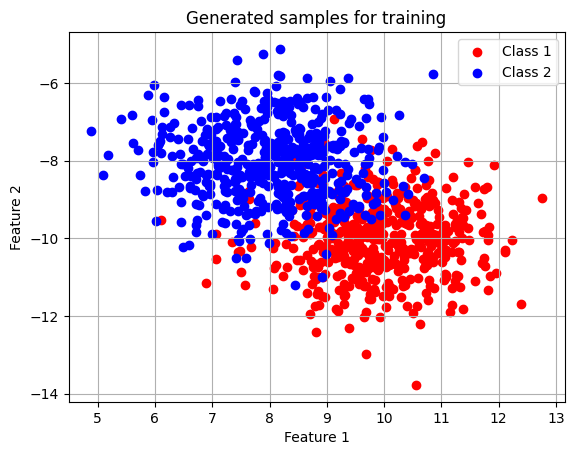

In [ ]:
# Train a Naive Bayes Classifier from scratch

import numpy as np

# Set random seed for reproducibility
rng = np.random.default_rng(0)

# Parameters
D = 2  # number of features
N = 500  # samples per class

# Generate samples for class 1
mean1 = np.array([10, -10])  # different means for features in class 1
X_1 = rng.normal(loc=mean1, scale=1, size=(N, D))

# Generate samples for class 2
mean2 = np.array([8, -8])  # different means for features in class 2
X_2 = rng.normal(loc=mean2, scale=1, size=(N, D))

# Labels
Y_1 = np.zeros((N,1), dtype=int)
Y_2 = np.ones((N,1), dtype=int)

# plot the data

plt.scatter(X_1[:,0], X_1[:, 1], color="r", label="Class 1")
plt.scatter(X_2[:,0], X_2[:, 1], color="b", label="Class 2")
plt.title('Generated samples for training')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

In [3]:
# Combine samples and labels and shuffle them up
X = np.vstack((X_1, X_2))
Y = np.vstack((Y_1, Y_2))

# shuffle rows
indices = rng.permutation(X.shape[0])

X = X[indices]
Y = Y[indices]

print(X.shape, Y.shape)

(1000, 2) (1000, 1)


In [4]:
# Train-Test Split
X_train, Y_train = X[:800], Y[:800]
X_test, Y_test = X[800:], Y[800:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800, 2) (800, 1)
(200, 2) (200, 1)


In [5]:
# Train Naive Bayes Classifier
def NaiveBayes(X_train: npt.NDArray[np.float64], Y_train: npt.NDArray[np.int_]) -> Tuple[npt.NDArray[np.float64], npt.NDArray[np.float64]]:
    # Need to Learn P(Y) & P(x_i | Y) for each feature i
    # We use MLE estimates to learn the parameters for these distributions
    """
    Naive Bayes Classifier (Gaussian NB)

    Model:
        P(Y = c) ~ Categorical(θ_c)
        P(X_i | Y = c) ~ Normal(μ_ic, σ_ic^2)

    MLE Estimates:
        θ_c = |N_c| / N
        μ_ic = (1 / |N_c|) * Σ_{n:Y_n=c} x_{ni}
        σ_ic^2 = (1 / |N_c|) * Σ_{n:Y_n=c} (x_{ni} - μ_ic)^2
    """

    # For P(Y)
    num_classes, class_counts = np.unique(Y_train, return_counts=True) 
    Y_params = class_counts / class_counts.sum() # Shape: (N_c,)

    # For P(x_i | Y)
    D = X_train.shape[1]
    X_params = np.empty((len(num_classes), D, 2))  # Shape: (|C|, D, 2) to store \mu__{ic} and \sigma_{ic} for P(x_i | Y=c)
    for c in num_classes:
        X_c = X_train[Y_train.flatten() == c]  # select samples where Y=c Shape: (N_c, D)
        X_params[c, :, 0] = X_c.mean(axis = 0) # contract N_c axis
        X_params[c, :, 1] = X_c.std(axis = 0) + 1e-6 # contract N_c axis
    
    return Y_params, X_params
    


In [6]:
from scipy.stats import norm
def predictNaiveBayes(learned_y: npt.NDArray, learned_x: npt.NDArray, X: npt.NDArray) -> int:
    # We predict the posterior probability for Y using the learned params
    # P(Y = c) proportianal to Prod(P(X_j|Y=c)) * P(Y=c)
    # equivalent to P(Y=c) proportianal to log(P(X_j|Y=c) + log(P(Y=c)
    means = learned_x[:, :, 0]  # Shape: (|C|, D)
    stds = learned_x[:, :, 1]   # Shape: (|C|, D)

    # broadcast for generalizability
    means = means[np.newaxis, :, :]
    stds = stds[np.newaxis, :, :]
    X = X[:, np.newaxis, :]

    # Compute First Term
    LL_sums = norm.logpdf(X, loc=means, scale=stds) # Shape: (N, C, D)
    LL_sums = LL_sums.sum(axis = 2) # contract axis D, Shape: (N, C)

    # Compute Second Term
    Log_prior = np.log(learned_y) # Shape: (C,)

    # Compute posterior
    posteriors = LL_sums + Log_prior # Shape: (N, C)

    # Predictions
    Y_pred = np.argmax(posteriors, axis=1).reshape(-1, 1) # contract C axis

    return Y_pred



In [7]:
y_learned, x_learned = NaiveBayes(X_train, Y_train)
print(y_learned.shape, x_learned.shape)

Y_pred = predictNaiveBayes(y_learned, x_learned, X_test)

(2,) (2, 2, 2)


In [8]:
# Accuracy 
acc = (Y_pred == Y_test).mean() * 100
print(f"Accuracy of Naive Bayes Classifier: {acc:.2f}%")

Accuracy of Naive Bayes Classifier: 91.50%
